# ML Model to predict future asset prices

Uses a common core as classify.

In [3]:
from OP_Predict_Config import *
from OP_Predict_Util import *
from OP_Predict_Indicators import *
from OP_Predict_RHConnect import *
from OP_Predict_Core import *
from OP_Predict_Model import *
print(keras.__version__)

3.3.3


In [4]:

model, features = trainModel_Multi()
# model.summary()

# run this in a loop
tickers = ['AAPL']
# get fresh data for prediction
model, history, dataset_val, test_data, predict_data, column_stop = Predict(model, tickers)
predict_data.tail()
prediction = predict_data.copy()
prediction.pop(0)
prediction.shape


2024_06_17
Server already queried for today, training data is stocked
multi_hour_3month_2024_06_17.json
Robhinhood Credentials, are not defined
loading files from:data/long/
(84480, 9)
(450, 55)
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - loss: 0.1931 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.2514 - val_sparse_categorical_accuracy: 0.9444 - learning_rate: 1.0000e-04
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1926 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.2506 - val_sparse_categorical_accuracy: 0.9444 - learning_rate: 1.0000e-04
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1920 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.2496 - val_sparse_categorical_accuracy: 0.9444 - learning_rate: 1.0000e-04
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1913 - sparse_categorical_accuracy: 0.9848 - val_loss: 0.2484 - val_sparse_categorical_accuracy: 0.9444 - learning_rate: 1.0000e-04
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8

(64, 35)

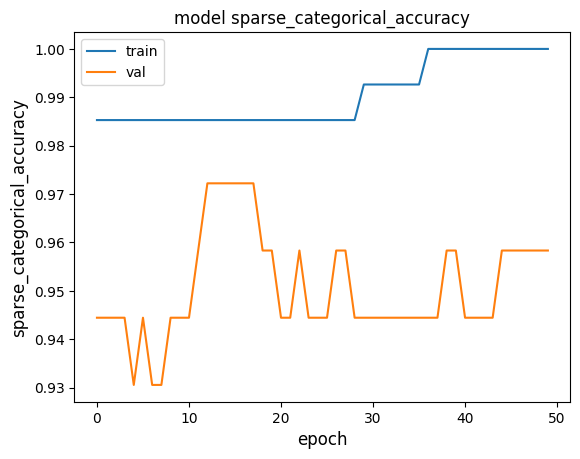

In [5]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

In [6]:
test_loss, test_acc = model.evaluate(dataset_val)

print("PAST, FUTURE, BATCH_SIZE, EPOCHS, test_acc, test_loss", PAST, FUTURE, BATCH_SIZE, EPOCHS, test_acc, test_loss)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2151 - sparse_categorical_accuracy: 0.9618 
PAST, FUTURE, BATCH_SIZE, EPOCHS, test_acc, test_loss 64 2 64 50 0.9583333134651184 0.21943990886211395


In [7]:
"""
## Prediction
The trained model above is now able to make predictions for 5 sets of values from
validation set.
"""

# for inputs, targets in dataset_val.as_numpy_iterator():
#     print(model.predict(inputs), targets)

prediction = predict_data[[i for i in range(1,  column_stop )]].values

sequence_length = int(PAST / STEP)
input_dataset = keras.preprocessing.timeseries_dataset_from_array(prediction, None, sequence_length=sequence_length)

predict_result = model.predict(input_dataset, batch_size=64, steps=None, callbacks=None)
print(predict_result)

df_target = mergePreviousMultiData("AAPL", "short")
df_source = mergePreviousMultiData("AAPL", "long")

print("Target:", df_target['close_price'].tail(1))
print("Last:", df_source['close_price'].tail(1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
[[0.03958642 0.96041363]]
loading files from:data/short/
(84084, 9)
loading files from:data/long/
(84480, 9)
Target: 389    216.71
Name: close_price, dtype: float64
Last: 383    216.71
Name: close_price, dtype: float64
